<a href="https://colab.research.google.com/github/apoorvakashi/HeartDiseaseClassification-NASTECH/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('/content/heart.csv')

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.columns = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg', 'thalach','exang', 'oldpeak','slope','ca','thal','target']

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [17]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending =False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
import numpy as np

import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
px.pie(df, names='target')

In [26]:
px.histogram(df,
             x='age',
             hover_data=df.columns, 
             marginal="box",
             color='target')

In [28]:
px.pie(df, names='sex',
       hole=.6,
       )

In [31]:
df_sex = df.groupby(["sex","target"]).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

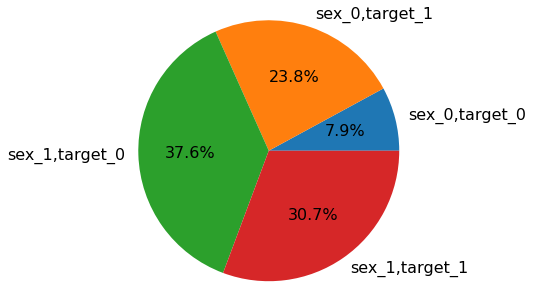

In [32]:
plt.pie(df_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

Y = df['target']
X = df.drop('target',axis=1)
x_train, x_validation, y_train, y_validation = train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=254,shuffle=True)

In [58]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-08,hidden_layer_sizes=(60,),activation='logistic', random_state=(2),max_iter=10000)
clf = clf.fit(x_train,y_train)
predictCLF = clf.predict(x_validation)

In [59]:
print(classification_report(predictCLF,y_validation))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        25
           1       0.79      0.75      0.77        36

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



In [60]:
acc_CLF=accuracy_score(predictCLF,y_validation)
print(acc_CLF)

0.7377049180327869


In [61]:
from sklearn.linear_model import LogisticRegression

In [74]:
clf = LogisticRegression(random_state=0, max_iter = 2000).fit(x_train, y_train)

In [75]:
clf.score(x_validation, y_validation)

0.8524590163934426